# Importaciones

In [21]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt

# Eliminación de campos irrelevantes
Al tratar de clasificar si un alumno promocionará o no en función de sus notas pasadas y su contexto,
no tiene mucho sentido utilizar las notas relacionadas con ese mismo curso 1FPB y con el siguiente. 
Tampoco el ID aportará nada, ya que es un identificador interno generado por mi.

In [3]:
# Cargar el dataset
data = pd.read_csv(r'DATA_UNIDO_FINAL_INPUTADOH_ENCODED_NOOUTLIERS_NORM.csv')

In [4]:
# SEPARO TODOS LOS DATOS DE FPB Y EL ID QUE NO APORTA INFO.

# Lista de nombres de las columnas a separar
columnas_separar = ['ID','1FPB_MEDIA_1EV','1FPB_MEDIA_2EV','1FPB_P_1EV','1FPB_P_2EV','1FPB_CA_1EV',
                    '1FPB_CA_2EV','1FPB_CS_1EV','1FPB_CS_2EV','ID', '1FPB_MEDIA_EVF', '1FPB_P_EVF',
                    '1FPB_CA_EVF', '1FPB_CS_EVF']

# Crear un nuevo DataFrame con solo las columnas seleccionadas
df_sinFPB = data.copy()

df_sinFPB.drop(columns=columnas_separar, inplace=True)

In [5]:
df_sinFPB.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 80 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   A_FECHA_NAC            31 non-null     int64  
 1   A_PAIS_MALI            31 non-null     int64  
 2   A_PAIS_ESPAÑA          31 non-null     int64  
 3   A_PAIS_COLOMBIA        31 non-null     int64  
 4   A_PAIS_MARRUECOS       31 non-null     int64  
 5   A_PAIS_ECUADOR         31 non-null     int64  
 6   A_PAIS_CHINA           31 non-null     int64  
 7   A_PAIS_RUMANIA         31 non-null     int64  
 8   A_IDIOMA_NVL           31 non-null     int64  
 9   P_PAIS_OTRO_NO_EU      31 non-null     int64  
 10  P_PAIS_ESPAÑA          31 non-null     int64  
 11  P_PAIS_OTRO_EU         31 non-null     int64  
 12  M_PAIS_OTRO_NO_EU      31 non-null     int64  
 13  M_PAIS_ESPAÑA          31 non-null     int64  
 14  M_PAIS_OTRO_EU         31 non-null     int64  
 15  P_EDAD_5

# Selección de variables por P-VALUE
Un valor bajo de p-value sugiere que la característica proporciona información útil
y relevante para predecir la variable objetivo.

`P-value<=0.2` -> Utilizo un umbral alto, en lugar del típico 0.05, ya que tengo pocos datos y no quiero excluir muchas características.

Utilizo: `f_classif` -> un método estadístico que se utiliza para calcular el valor F y el p-value asociado entre cada característica y la variable objetivo en un problema de clasificación.

In [10]:
# Identificar características constantes - si aparecen me fallará el algoritmo de selección
def find_constant_features(df):
    constant_features = []
    for column in df.columns:
        if df[column].nunique() == 1:
            constant_features.append(column)
    return constant_features

constantes_encontradas = find_constant_features(df_sinFPB)

print("Características constantes encontradas:")
print(constantes_encontradas)

#no hay

Características constantes encontradas:
[]


In [18]:
#SELECCIONO UN VALOR DE K MUESTRAS PARA UN P-VALUE CONCRETO: 0.2
np.seterr(divide='warn', invalid='warn')

#Divido el conjunto de datos en 80 entrenamiento y 20 test

X_train, X_test, y_train, y_test = train_test_split(df_sinFPB.drop(labels=['PROMOCIONA'], axis=1),df_sinFPB['PROMOCIONA'], test_size=0.2, random_state=0)

names=pd.DataFrame(X_train.columns)
max_i = X_train.shape[1]

p_val=0.2

model = SelectKBest(score_func= f_classif)
results = model.fit(X_train, y_train)
results_df=pd.DataFrame(results.pvalues_)
scored=pd.concat([names,results_df], axis=1)
scored.columns = ['Feature', 'P_Values']
scored=scored.sort_values(by=['P_Values'])

for i in range(0, max_i):

# Seleccionamos el p-valor en la iteración específica de k
    p_valor_iteracion_concreta = scored.iloc[i]['P_Values']

    if (p_valor_iteracion_concreta>p_val): #P-VALUE <=0.2
        break
        
    print("El p-valor en la iteración", i, "es:", p_valor_iteracion_concreta)
    
k_selected=i
print("k_selected:", k_selected)

#19 características con p-value no superior a 0.2

El p-valor en la iteración 0 es: 0.0008395186061254788
El p-valor en la iteración 1 es: 0.0009392890846016546
El p-valor en la iteración 2 es: 0.002351953706247584
El p-valor en la iteración 3 es: 0.0046336995206426096
El p-valor en la iteración 4 es: 0.010064022044649991
El p-valor en la iteración 5 es: 0.024551945982397676
El p-valor en la iteración 6 es: 0.032215441558062996
El p-valor en la iteración 7 es: 0.032215441558062996
El p-valor en la iteración 8 es: 0.05210530613009095
El p-valor en la iteración 9 es: 0.06053112661104088
El p-valor en la iteración 10 es: 0.0699018190786076
El p-valor en la iteración 11 es: 0.0745097215384309
El p-valor en la iteración 12 es: 0.10118885721582513
El p-valor en la iteración 13 es: 0.12260972524865314
El p-valor en la iteración 14 es: 0.14189606266791308
El p-valor en la iteración 15 es: 0.1464473683440847
El p-valor en la iteración 16 es: 0.16071192802358353
El p-valor en la iteración 17 es: 0.1726458100864003
El p-valor en la iteración 18 e

C:\Users\abrah\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 7 32] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\abrah\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


In [19]:
#Muestro las características con ese k_selected

names=pd.DataFrame(X_train.columns)

model = SelectKBest(score_func= f_classif, k=k_selected)
results = model.fit(X_train, y_train)
results_df=pd.DataFrame(results.pvalues_)
scored=pd.concat([names,results_df], axis=1)
scored.columns = ['Feature', 'P_Values']
scored.sort_values(by=['P_Values']).head(k_selected)

#Se ordenan por mayor peso: P_value menor

C:\Users\abrah\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [ 7 32] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\abrah\anaconda3\lib\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,Feature,P_Values
78,REC_EVEX,0.000840
76,REC_1EV,0.000939
77,REC_2EV,0.002352
75,REP_1FPB,0.004634
49,1ESO_I_1EV,0.010064
42,FAMILIARES_RESIDENCIA,0.024552
10,P_PAIS_ESPAÑA,0.032215
29,M_TRABAJO_NO_TRABAJA,0.032215
55,1ESO_MEDIA_1EV,0.052105
57,1ESO_MEDIA_EVF,0.060531


In [20]:
#creo un nuevo dataset solo con las columnas seleccionadas y la variable objetivo PROMOCIONA.

# Obtiene las columnas seleccionadas
selected_columns = X_train.columns[results.get_support()]

# Conserva solo las columnas seleccionadas y la variable objetivo en el DataFrame original
df_sinFPB_sel = df_sinFPB[selected_columns.append(pd.Index(['PROMOCIONA']))]

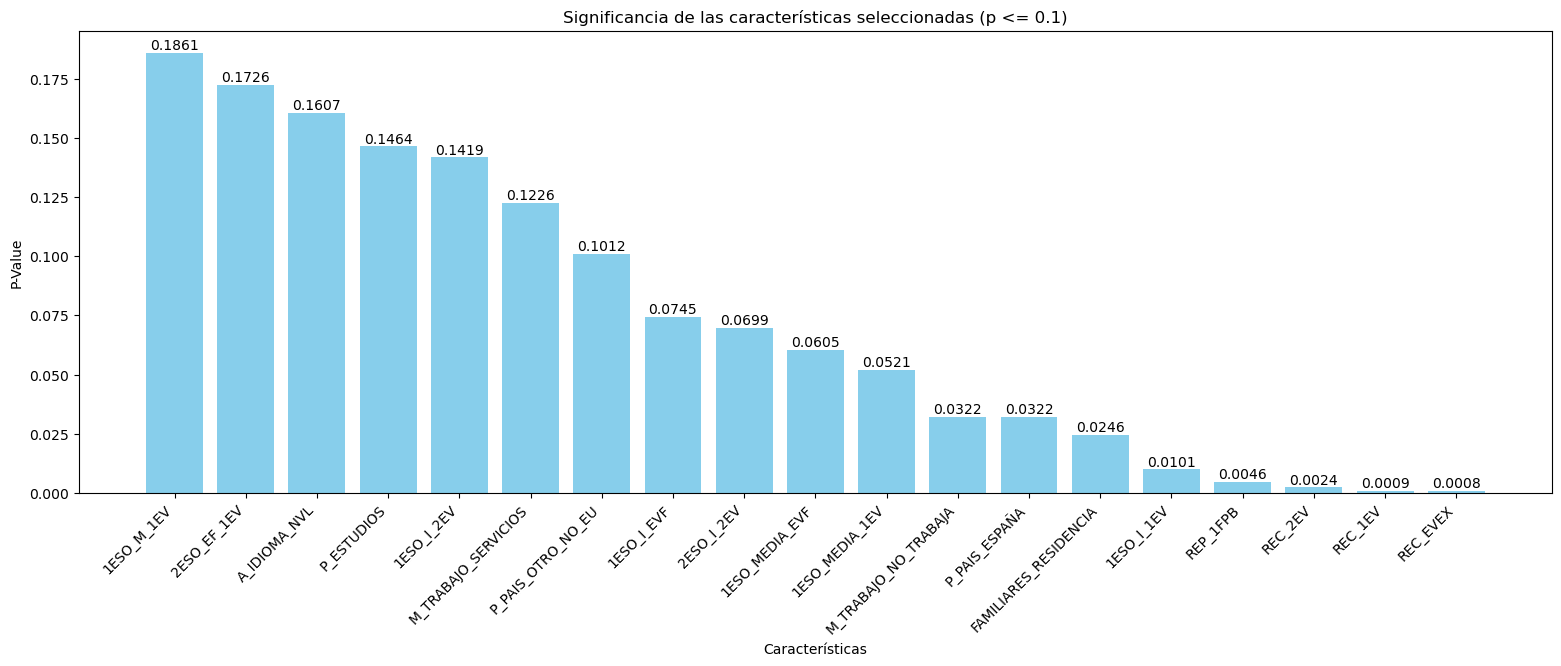

In [23]:
#Represento en un gráfico las características seleccionadas

# Filtra las características con valor p <= 0.2
selected_features_mask = results.pvalues_ <= p_val
selected_features = X_train.columns[selected_features_mask]
selected_feature_pvalues = results.pvalues_[selected_features_mask]

# Ordena las características por sus valores p de mayor a menor
sorted_indices = np.argsort(selected_feature_pvalues)[::-1]
selected_features = selected_features[sorted_indices]
selected_feature_pvalues = selected_feature_pvalues[sorted_indices]

# Grafica las características seleccionadas junto con sus valores p
plt.figure(figsize=(k_selected, 6))
bars = plt.bar(selected_features, selected_feature_pvalues, color='skyblue')
plt.xlabel('Características')
plt.ylabel('P-Value')
plt.title('Significancia de las características seleccionadas (p <= 0.1)')
plt.xticks(rotation=45, ha='right')

# Añade el valor p encima de cada barra
for bar, p_value in zip(bars, selected_feature_pvalues):
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, yval, round(p_value, 4), ha='center', va='bottom')

plt.show()

# Genera el dataset de salida con las características seleccionadas
selected_features_df = pd.DataFrame({'Feature': selected_features, 'P_Values': selected_feature_pvalues})

# Crea un nuevo dataset con solo las características seleccionadas para entrenar el modelo
X_train_selected = X_train[selected_features]

In [24]:
df_sinFPB_sel.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 20 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   A_IDIOMA_NVL           31 non-null     int64  
 1   P_PAIS_OTRO_NO_EU      31 non-null     int64  
 2   P_PAIS_ESPAÑA          31 non-null     int64  
 3   M_TRABAJO_SERVICIOS    31 non-null     int64  
 4   M_TRABAJO_NO_TRABAJA   31 non-null     int64  
 5   P_ESTUDIOS             31 non-null     int64  
 6   FAMILIARES_RESIDENCIA  31 non-null     int64  
 7   1ESO_I_1EV             31 non-null     int64  
 8   1ESO_I_2EV             31 non-null     int64  
 9   1ESO_I_EVF             31 non-null     int64  
 10  1ESO_M_1EV             31 non-null     int64  
 11  1ESO_MEDIA_1EV         31 non-null     float64
 12  1ESO_MEDIA_EVF         31 non-null     float64
 13  2ESO_EF_1EV            31 non-null     int64  
 14  2ESO_I_2EV             31 non-null     int64  
 15  REP_1FPB

# Guardado del nuevo dataset seleccionado en csv como 'DATA_SELECTED_VALUES_SINFPB.csv'

In [25]:
# Guarda el DataFrame en un archivo CSV
archivo_csv = 'DATA_SELECTED_VALUES_SINFPB.csv'
df_sinFPB_sel.to_csv(archivo_csv, index=False)